In [5]:
# %load ../common_.py
import sys
sys.path.append("..")
from common import *

In [9]:
import zarr

In [6]:
data_dir = Path(os.environ["VSC_DATA_VO_USER"]) / "datasets/wbc"

In [7]:
df_scip = pq.read_table(data_dir / f"results/scip/202201141724/features.parquet").to_pandas()
df_scip["meta_group"] = df_scip["meta_group"].astype(int)
df_scip["meta_part"] = df_scip["meta_part"].astype(int)
df_scip = df_scip[numpy.load(data_dir / "results/scip/202201141724/columns.npy", allow_pickle=True)]
df_scip = df_scip.loc[numpy.load(data_dir / "results/scip/202201141724/index.npy", allow_pickle=True)]
df_scip.shape

(247993, 2519)

In [45]:
images = []
bboxes = []

n = 2000
df = df_scip.sample(n=1000)

for path, gdf in df.groupby("meta_path"):
    print(path)
    z = zarr.open(path)
    pixels = z.get_coordinate_selection(gdf["meta_zarr_idx"].values)
    shapes = numpy.array(z.attrs["shape"])[gdf["meta_zarr_idx"].values]
    
    for i, (p, s) in enumerate(zip(pixels, shapes)):
        r = gdf.iloc[i]
        minr, minc, maxr, maxc = int(r["meta_bbox_minr"]), int(r["meta_bbox_minc"]), int(r["meta_bbox_maxr"]), int(r["meta_bbox_maxc"])
        images.append(p.reshape(s)[:, minr:maxr, minc:maxc])
    print(len(images))

/data/gent/vo/000/gvo00070/vsc42015/datasets/wbc/images/wbc2_1_Focused.zarr
100
/data/gent/vo/000/gvo00070/vsc42015/datasets/wbc/images/wbc2_2_Focused.zarr
188
/data/gent/vo/000/gvo00070/vsc42015/datasets/wbc/images/wbc2_3_Focused.zarr
281
/data/gent/vo/000/gvo00070/vsc42015/datasets/wbc/images/wbc3_1_early_Focused.zarr
368
/data/gent/vo/000/gvo00070/vsc42015/datasets/wbc/images/wbc3_1_late_Focused.zarr
444
/data/gent/vo/000/gvo00070/vsc42015/datasets/wbc/images/wbc3_2_early_Focused.zarr
546
/data/gent/vo/000/gvo00070/vsc42015/datasets/wbc/images/wbc3_2_late_Focused.zarr
631
/data/gent/vo/000/gvo00070/vsc42015/datasets/wbc/images/wbc3_3_early_Focused.zarr
707
/data/gent/vo/000/gvo00070/vsc42015/datasets/wbc/images/wbc3_3_late_Focused.zarr
806
/data/gent/vo/000/gvo00070/vsc42015/datasets/wbc/images/wbc4_1_early_Focused.zarr
927
/data/gent/vo/000/gvo00070/vsc42015/datasets/wbc/images/wbc4_1_late_Focused.zarr
1000


In [46]:
a = 900
b = 1600
image = numpy.zeros(shape=(a, b, 4), dtype="float")

for im in images:
    x = numpy.random.randint(0, a - im.shape[1])
    y = numpy.random.randint(0, b - im.shape[2])
    c = numpy.random.randint(0, im.shape[0])
    
    plane = plt.get_cmap("viridis")((im[c] - im[c].min()) / (im[c].max() - im[c].min()))
    image[
        x:x+plane.shape[0],
        y:y+plane.shape[1]
    ] = plane

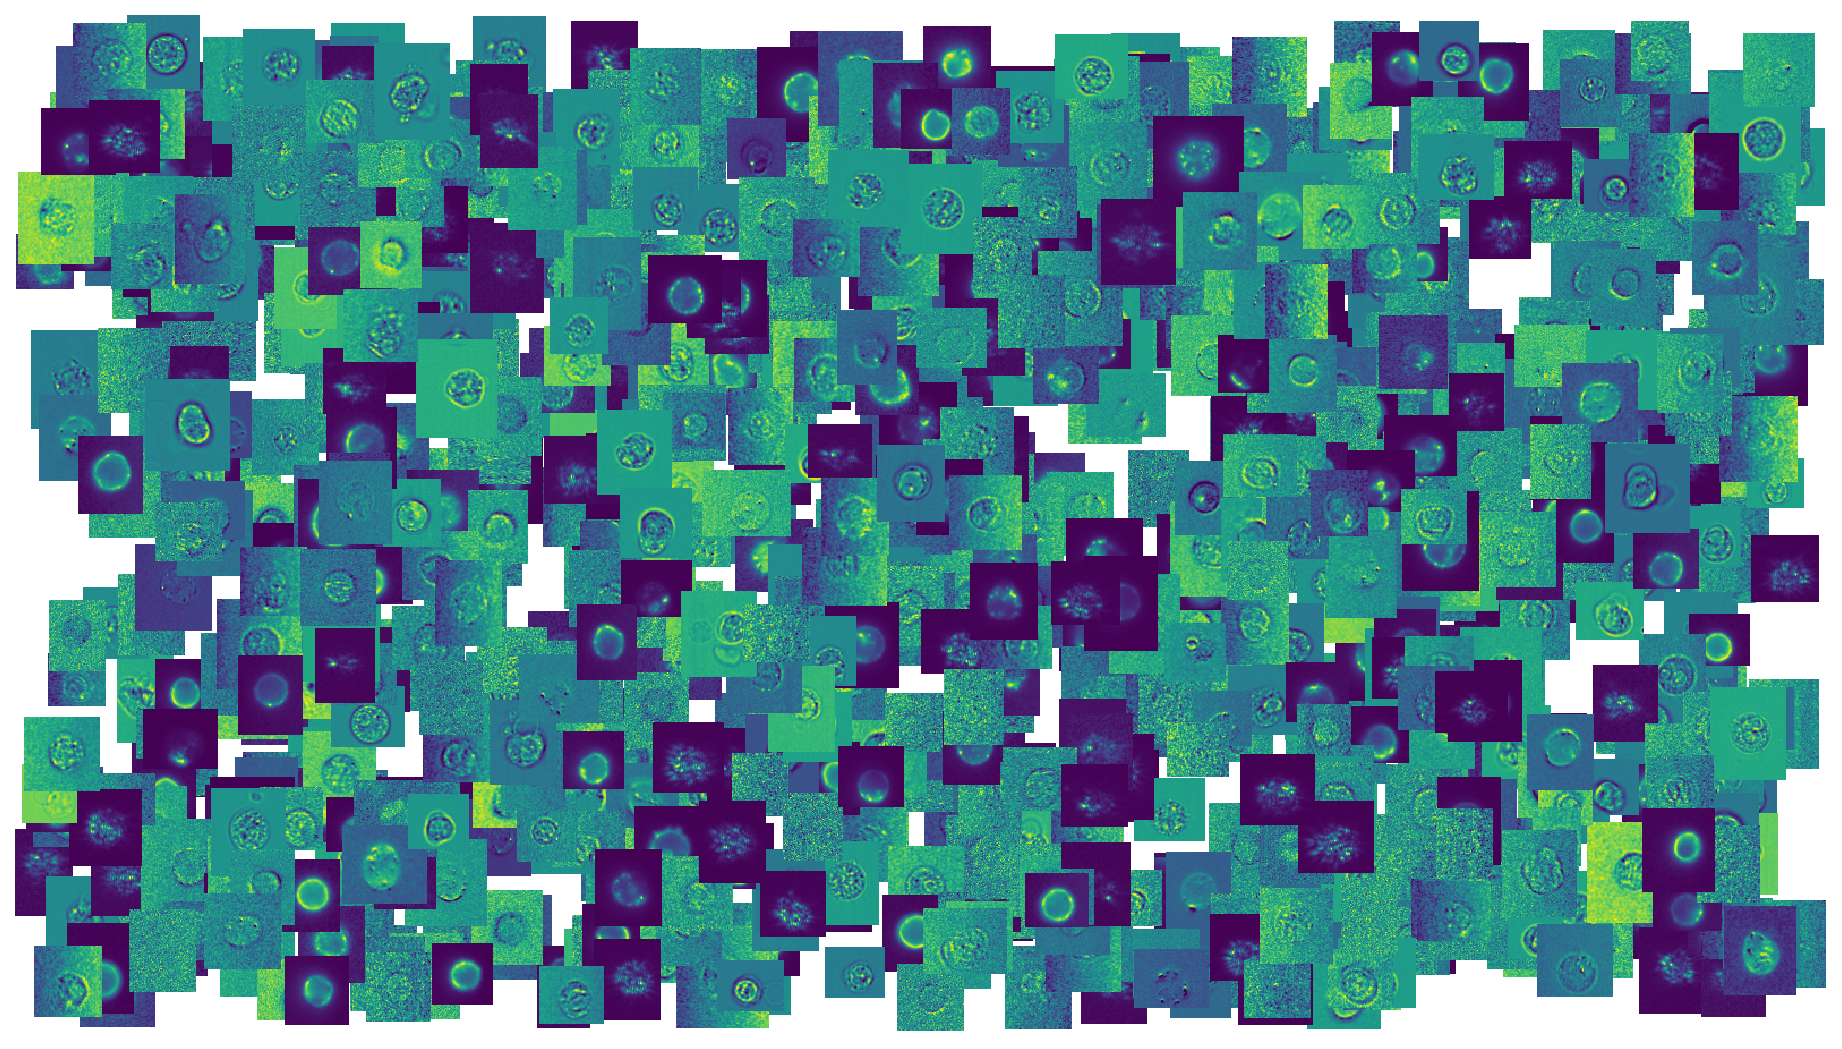

In [47]:
fig, ax = plt.subplots(figsize=(16, 9), dpi=150)
ax.imshow(image)
ax.set_axis_off()

In [52]:
im = images[0]
image = numpy.empty(shape=im.shape + (4,), dtype=float)
for c in range(len(im)):
    image[c] = plt.get_cmap("viridis")((im[c] - im[c].min()) / (im[c].max() - im[c].min()))

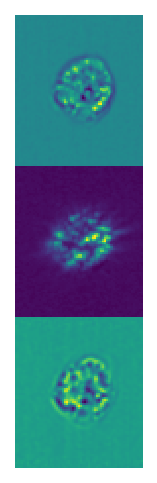

In [54]:
fig, ax = plt.subplots(dpi=150)
ax.imshow(numpy.vstack(image[[0,5,8]]))
ax.set_axis_off()